In [1]:
import numpy as np
import pandas as pd
import os

from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten, Dense, Activation, Dropout
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# My LeNet architecture
model = Sequential()

# conv filters of 5x5 each

# Layer 1
model.add(Convolution2D(32, 5, 5, input_shape=(192, 192, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Convolution2D(64, 5, 5))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))    

model.add(Flatten())

# Layer 3
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))

# Layer 4
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))

# Layer 5
model.add(Dense(2))
model.add(Activation("softmax"))

In [3]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Load Dataset

In [69]:
X = []
y = []

In [5]:
with open("X.pkl", 'rb') as picklefile: 
    X = pickle.load(picklefile)

In [6]:
with open("y.pkl", 'rb') as picklefile: 
    y = pickle.load(picklefile)

In [70]:
# set folder path
folderpath = 'Images/Train/Undistorted/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        X.append(np.asarray(img))
        y.append(0)
    else:
        print filename, 'not a pic'    

In [4]:
import pickle

In [12]:
with open('undistorted_X.pkl', 'wb') as picklefile:
    pickle.dump(X, picklefile)

In [13]:
with open('undistorted_y.pkl', 'wb') as picklefile:
    pickle.dump(y, picklefile)

In [7]:
# set folder path
folderpath = 'Images/Train/DigitalBlur2/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        X.append(np.asarray(img))
        y.append(1)
    else:
        print filename, 'not a pic'

In [9]:
len(y)

2731

In [17]:
with open('X.pkl', 'wb') as picklefile:
    pickle.dump(X, picklefile)

In [18]:
with open('y.pkl', 'wb') as picklefile:
    pickle.dump(y, picklefile)

In [10]:
X_stacked = np.stack(X)
X_norm = X_stacked/255.
y_cat = to_categorical(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_cat, train_size=2500, random_state=42)

In [12]:
# Data augmenter
dg = image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

## Load initial model weights

In [13]:
model.load_weights('lenet_weights.h5')

## Model

In [14]:
cb_es = EarlyStopping(monitor='val_acc', patience=2, verbose=1)
cb_mc = ModelCheckpoint('lenet_weights2.h5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True)

In [15]:
# Fit generator
# play with samples/epoch, nb_epoch, val_samples.

model.fit_generator(dg.flow(X_train, y_train), samples_per_epoch=3000, nb_epoch=30, validation_data=dg.flow(X_test, y_test), nb_val_samples=300, callbacks=[cb_es, cb_mc])

Epoch 1/30
2980/3000 [============================>.] - ETA: 2s - loss: 0.1901 - acc: 0.9460  

//anaconda/lib/python2.7/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: val_acc improved from -inf to 0.96636, saving model to lenet_weights2.h5
3012/3000 [==============================] - 416s - loss: 0.1883 - acc: 0.9465 - val_loss: 0.1004 - val_acc: 0.9664
Epoch 2/30
3012/3000 [==============================] - 386s - loss: 0.1013 - acc: 0.9708 - val_loss: 0.0224 - val_acc: 0.9967
Epoch 3/30
3012/3000 [==============================] - 380s - loss: 0.0729 - acc: 0.9811 - val_loss: 0.0902 - val_acc: 0.9664
Epoch 4/30
3012/3000 [==============================] - 377s - loss: 0.1118 - acc: 0.9718 - val_loss: 0.0128 - val_acc: 0.9967
Epoch 5/30
3016/3000 [==============================] - 379s - loss: 0.1051 - acc: 0.9715 - val_loss: 0.1197 - val_acc: 0.9694
Epoch 00004: early stopping


## Test on real pics

In [32]:
clean_pics = []
blurry_pics = []


In [6]:
backBlur_pics = []

In [33]:
# set folder path
folderpath = 'Images/clearSamples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        clean_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

In [34]:
# set folder path
folderpath = 'Images/natblurSamples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        blurry_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

In [7]:
# set folder path
folderpath = 'Images/backBlurSamples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        backBlur_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

In [82]:
len(backBlur_pics)

7

In [9]:
backBlur_pics_array = np.stack(backBlur_pics)/255.

In [36]:
len(blurry_pics)

28

In [37]:
clean_pics_array = np.stack(clean_pics)/255.

In [38]:
blurry_pics_array = np.stack(blurry_pics)/255.

In [42]:
blurry_pics_array.shape

(28, 192, 192, 3)

In [44]:
model.predict_classes(clean_pics_array)

16/16 [==============================] - 0s


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
model.predict_proba(clean_pics_array)

16/16 [==============================] - 0s


array([[  9.99999166e-01,   8.47247861e-07],
       [  9.76107121e-01,   2.38929167e-02],
       [  9.93018031e-01,   6.98202476e-03],
       [  9.99996185e-01,   3.77086599e-06],
       [  1.00000000e+00,   4.99104610e-14],
       [  1.00000000e+00,   8.84988229e-16],
       [  9.58419383e-01,   4.15805727e-02],
       [  1.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   2.15501283e-09],
       [  9.83334243e-01,   1.66657493e-02],
       [  1.00000000e+00,   1.06239604e-17],
       [  9.99967575e-01,   3.24022658e-05],
       [  1.00000000e+00,   3.08845935e-11],
       [  1.00000000e+00,   2.12371787e-11],
       [  1.00000000e+00,   7.84776886e-17],
       [  1.00000000e+00,   3.81958605e-21]], dtype=float32)

In [45]:
model.predict_classes(blurry_pics_array)

28/28 [==============================] - 0s


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1])

In [90]:
model.predict_proba(blurry_pics_array)

28/28 [==============================] - 0s


array([[  9.99991655e-01,   8.28602788e-06],
       [  2.93354075e-02,   9.70664620e-01],
       [  9.51888204e-01,   4.81118150e-02],
       [  9.91434097e-01,   8.56589619e-03],
       [  2.93354075e-02,   9.70664620e-01],
       [  9.99984622e-01,   1.53655328e-05],
       [  9.97849107e-01,   2.15089903e-03],
       [  1.00000000e+00,   4.09413238e-20],
       [  9.99999404e-01,   5.87542445e-07],
       [  8.63840759e-01,   1.36159256e-01],
       [  7.04566777e-01,   2.95433223e-01],
       [  4.54591438e-02,   9.54540849e-01],
       [  2.93992683e-02,   9.70600724e-01],
       [  6.12833835e-02,   9.38716590e-01],
       [  2.93354075e-02,   9.70664620e-01],
       [  9.92878497e-01,   7.12153688e-03],
       [  1.00000000e+00,   2.55035673e-08],
       [  6.80495024e-01,   3.19504976e-01],
       [  2.97666360e-02,   9.70233440e-01],
       [  5.34660518e-02,   9.46533978e-01],
       [  6.11283958e-01,   3.88716072e-01],
       [  3.47494967e-02,   9.65250492e-01],
       [  

In [10]:
model.predict_proba(backBlur_pics_array)

7/7 [==============================] - 0s


array([[  1.00000000e+00,   7.19240607e-31],
       [  9.99990940e-01,   9.08570655e-06],
       [  1.00000000e+00,   1.16131817e-14],
       [  1.00000000e+00,   3.99548874e-08],
       [  1.00000000e+00,   3.96198019e-10],
       [  1.00000000e+00,   1.00476560e-09],
       [  9.99983668e-01,   1.63695859e-05]], dtype=float32)

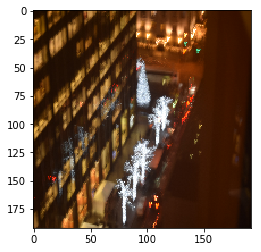

In [89]:
plt.imshow(blurry_pics_array[0])
plt.show()

In [93]:
model.save('lenet_3rdPass.h5')

In [86]:
model.save_weights('test_weights.h5')

## Test the classifier on the "Background blur only" set

In [20]:
backBlur_pics = []
backBlur_filenames = []

# set folder path
folderpath = 'Images/backBlurAll_longIter/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        backBlur_filenames.append(filename)
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        backBlur_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

df_backBlur = pd.DataFrame(backBlur_filenames, columns=['filename'])

.DS_Store not a pic


In [21]:
backBlur_pics_array = np.stack(backBlur_pics)/255.

In [22]:
df_backBlur['blur_class'] = model.predict_classes(backBlur_pics_array)

1000/1000 [==============================] - 33s     

In [23]:
if not os.path.exists(folderpath+'blurry'):
    os.mkdir(folderpath+'blurry')

for index, row in df_backBlur.iterrows():
    if row['blur_class'] == 1:
        oldpath = folderpath + row['filename']
        newpath = folderpath + 'blurry/' + row['filename']
        os.rename(oldpath, newpath)

## Test the classifier on the Naturally Blurred set

In [16]:
natBlur_pics = []
natBlur_filenames = []

# set folder path
folderpath = 'Images/natBlurAll_longIter/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        natBlur_filenames.append(filename)
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        natBlur_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

df_natBlur = pd.DataFrame(natBlur_filenames, columns=['filename'])

.DS_Store not a pic


In [17]:
natBlur_pics_array = np.stack(natBlur_pics)/255.

In [18]:
df_natBlur['blur_class'] = model.predict_classes(natBlur_pics_array)

411/411 [==============================] - 13s     


In [19]:
if not os.path.exists(folderpath+'blurry'):
    os.mkdir(folderpath+'blurry')

for index, row in df_natBlur.iterrows():
    if row['blur_class'] == 1:
        oldpath = folderpath + row['filename']
        newpath = folderpath + 'blurry/' + row['filename']
        os.rename(oldpath, newpath)

## Test classifier on M3 pics

In [24]:
m3Blur_pics = []
m3Blur_filenames = []

# set folder path
folderpath = 'Images/M3Samples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        m3Blur_filenames.append(filename)
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        m3Blur_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

df_m3Blur = pd.DataFrame(m3Blur_filenames, columns=['filename'])

In [25]:
m3Blur_pics_array = np.stack(m3Blur_pics)/255.

In [26]:
df_m3Blur['blur_class'] = model.predict_classes(m3Blur_pics_array)

4/4 [==============================] - 0s


In [27]:
if not os.path.exists(folderpath+'blurry'):
    os.mkdir(folderpath+'blurry')

for index, row in df_m3Blur.iterrows():
    if row['blur_class'] == 1:
        oldpath = folderpath + row['filename']
        newpath = folderpath + 'blurry/' + row['filename']
        os.rename(oldpath, newpath)

In [28]:
df_m3Blur

,filename,blur_class
0,225588_10100452581844163_5171555_n.jpg,0
1,225923_10100452581864123_5207008_n.jpg,0
2,230393_10100452581789273_2903274_n.jpg,0
3,231133_10100452581739373_3369180_n.jpg,0


## Test my clear samples

In [29]:
clearSample_pics = []
clearSample_filenames = []

# set folder path
folderpath = 'Images/clearSamples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        clearSample_filenames.append(filename)
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        clearSample_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

df_clearSample = pd.DataFrame(clearSample_filenames, columns=['filename'])
clearSample_pics_array = np.stack(clearSample_pics)/255.
df_clearSample['blur_class'] = model.predict_classes(clearSample_pics_array)

16/16 [==============================] - 0s


In [30]:
if not os.path.exists(folderpath+'blurry'):
    os.mkdir(folderpath+'blurry')

for index, row in df_clearSample.iterrows():
    if row['blur_class'] == 1:
        oldpath = folderpath + row['filename']
        newpath = folderpath + 'blurry/' + row['filename']
        os.rename(oldpath, newpath)

## Test my bad samples

In [31]:
blurSample_pics = []
blurSample_filenames = []

# set folder path
folderpath = 'Images/natBlurSamples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        blurSample_filenames.append(filename)
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        blurSample_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

df_blurSample = pd.DataFrame(blurSample_filenames, columns=['filename'])
blurSample_pics_array = np.stack(blurSample_pics)/255.
df_blurSample['blur_class'] = model.predict_classes(blurSample_pics_array)

.DS_Store not a pic
25/25 [==============================] - 0s


In [33]:
if not os.path.exists(folderpath+'blurry'):
    os.mkdir(folderpath+'blurry')

for index, row in df_blurSample.iterrows():
    if row['blur_class'] == 1:
        oldpath = folderpath + row['filename']
        newpath = folderpath + 'blurry/' + row['filename']
        os.rename(oldpath, newpath)

In [5]:
img = image.load_img('Images/NaturalBlurSet.xlsx', target_size=(192,192))

IOError: cannot identify image file 'Images/NaturalBlurSet.xlsx'

In [8]:
'.JPG'.lower()

'.jpg'